# SnorkelStreaming

# Baseline

Install requirements, uncomment following block and run it

In [8]:
# !pip install numpy
# !pip install pandas
# !pip install torch
# !pip install snorkel

Mount Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Import libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt

## Load and observe data

In [191]:
import pandas as pd

filename = '/content/drive/My Drive/SnorkelStreaming/data/card_transdata.csv'
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [193]:
df["fraud"].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simple preprocess

# Remove duplicates
df = df.drop_duplicates()

# Handle null values
df = df.dropna()

x = df.drop('fraud',axis=1)
y = df['fraud']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [195]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [196]:
y_predict=classifier.predict(x_test)

results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict})

y_train_predict=classifier.predict(x_train)
print("Train Acc: {}".format(accuracy_score(y_train,y_train_predict)))

print("Test Acc: {}".format(accuracy_score(y_test,y_predict)))

cm = confusion_matrix(y_test,y_predict)
print("Confusion Mat:\n{}".format(cm))

Train Acc: 0.9587257142857143
Test Acc: 0.95857
Confusion Mat:
[[271789   1874]
 [ 10555  15782]]


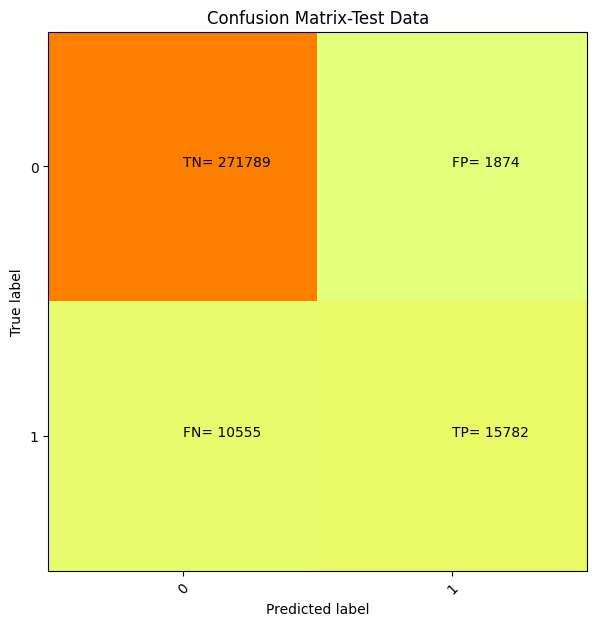

In [197]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [198]:
print(classification_report(y_test,y_predict))

nt=cm[0][0]
pf=cm[0][1]
nf=cm[1][0]
pt=cm[1][1]

recall=pt/(pt+nf)
print('Recall=',recall)

precision=pt/(pt+pf)
print("Precision=",precision)

specificity = nt /  (nt + nf)
print("Specificity = ", specificity)

accuracy = ( pt + nt ) / ( pt + nt + pf + nf)
print("accuracy =" , accuracy)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273663
         1.0       0.89      0.60      0.72     26337

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

Recall= 0.599233018187341
Precision= 0.8938604440416855
Specificity =  0.9626165245232766
accuracy = 0.95857


# Snorkel

In [31]:
from snorkel.labeling import labeling_function, PandasLFApplier
from snorkel.labeling.model import LabelModel

In [29]:
filename = '/content/drive/My Drive/SnorkelStreaming/data/card_transdata.csv'
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [65]:
fraud = df[df['fraud'] == 1]
non_fraud = df[df['fraud'] == 0]

In [66]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [67]:
non_fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [287]:
ABSTAIN = -1
FRAUD = 1
NOT_FRAUD = 0

def probabilistic_decision(probability_threshold):
    return FRAUD if np.random.random() < probability_threshold else ABSTAIN

@labeling_function()
def lf_distance_from_home_high(x):
    if x.distance_from_home > 100:
      return probabilistic_decision(0.75)
    elif x.distance_from_home > 50:
      return probabilistic_decision(0.6)
    return ABSTAIN

@labeling_function()
def lf_distance_from_last_transaction_high(x):
    threshold = 5
    probability_threshold = 0.5
    return probabilistic_decision(probability_threshold) if x.distance_from_last_transaction > threshold else ABSTAIN

@labeling_function()
def lf_high_ratio_to_median_purchase_price(x):
    threshold = 3
    probability_threshold = 0.5
    return probabilistic_decision(probability_threshold) if x.ratio_to_median_purchase_price > threshold else ABSTAIN

@labeling_function()
def lf_used_pin_number(x):
    probability_threshold = 0.9
    return NOT_FRAUD if x.used_pin_number == 1 and np.random.random() < probability_threshold else ABSTAIN

@labeling_function()
def lf_online_order_true(x):
    probability_threshold = 0.1
    return probabilistic_decision(probability_threshold) if x.online_order == 1 else ABSTAIN

lfs = [lf_distance_from_home_high, lf_distance_from_last_transaction_high, lf_high_ratio_to_median_purchase_price, lf_online_order_true, lf_used_pin_number]

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Simple preprocess

# Remove duplicates
df = df.drop_duplicates()

# Handle null values
df = df.dropna()

x = df.drop('fraud',axis=1)
y = df['fraud']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [289]:
applier = PandasLFApplier(lfs)

L_train = applier.apply(x_train)

100%|██████████| 700000/700000 [01:09<00:00, 10060.47it/s]


In [290]:
from snorkel.labeling import LFAnalysis

LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
lf_distance_from_home_high,0,[1],0.082336,0.023783,0.007459
lf_distance_from_last_transaction_high,1,[1],0.092809,0.026231,0.008490
lf_high_ratio_to_median_purchase_price,2,[1],0.078807,0.022917,0.007154
lf_online_order_true,3,[1],0.064811,0.019673,0.005926
lf_used_pin_number,4,[0],0.090529,0.025694,0.025694


In [291]:
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train, n_epochs=1000, log_freq=50, seed=123)

100%|██████████| 1000/1000 [00:01<00:00, 698.61epoch/s]


In [292]:
label = label_model.predict(L=L_train, tie_break_policy="abstain")

In [293]:
tn = fn = tp = fp = 0

for pred, actual in zip(label, y_train):
  if pred == -1:
    pred = 0

  if pred == 1 and actual == 1:
    tp += 1
  elif pred == 1 and actual == 0:
    fp += 1
  elif pred == 0 and actual == 0:
    tn += 1
  elif pred == 0 and actual == 1:
    fn += 1

print(f"tp={tp}, fp={fp}, tn={tn}, fn={fn}")

recall = tp/(tp + fn)
print('Recall=',recall)

precision=tp/(tp+fp)
print("Precision=",precision)

specificity = tn/(tn + fn)
print("Specificity = ", specificity)

accuracy = ( tp + tn ) / ( tp + tn + fp + fn)
print("accuracy =" , accuracy)


tp=40354, fp=154397, tn=484537, fn=20712
Recall= 0.6608259915501261
Precision= 0.2072081786486334
Specificity =  0.9590063513238027
accuracy = 0.7498442857142857


In [294]:
for i in range(len(label)):
  if label[i] == -1:
    label[i] = 0

y_train = label

In [295]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [296]:
y_predict=classifier.predict(x_test)

results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict})

print("Test Acc: {}".format(accuracy_score(y_test,y_predict)))

cm = confusion_matrix(y_test,y_predict)
print("Confusion Mat:\n{}".format(cm))

Test Acc: 0.9129133333333334
Confusion Mat:
[[257056  16607]
 [  9519  16818]]


In [297]:
print(classification_report(y_test,y_predict))

nt=cm[0][0]
pf=cm[0][1]
nf=cm[1][0]
pt=cm[1][1]

recall=pt/(pt+nf)
print('Recall=',recall)

precision=pt/(pt+pf)
print("Precision=",precision)

specificity = nt /  (nt + nf)
print("Specificity = ", specificity)

accuracy = ( pt + nt ) / ( pt + nt + pf + nf)
print("accuracy =" , accuracy)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95    273663
         1.0       0.50      0.64      0.56     26337

    accuracy                           0.91    300000
   macro avg       0.73      0.79      0.76    300000
weighted avg       0.92      0.91      0.92    300000

Recall= 0.6385693131336143
Precision= 0.5031563201196709
Specificity =  0.9642914751945981
accuracy = 0.9129133333333334


         precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273663
         1.0       0.89      0.60      0.72     26337

         accuracy                           0.96    300000
         macro avg       0.93      0.80      0.85    300000
         weighted avg       0.96      0.96      0.95    300000

         Recall= 0.599233018187341
         Precision= 0.8938604440416855
         Specificity =  0.9626165245232766
         accuracy = 0.95857

# Streaming Simulation

In [365]:
filename = '/content/drive/My Drive/SnorkelStreaming/data/card_transdata.csv'
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [366]:
chunk_num = 500

chunk_size = int(np.ceil(len(df) / chunk_num))

chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

print(len(chunks))

500


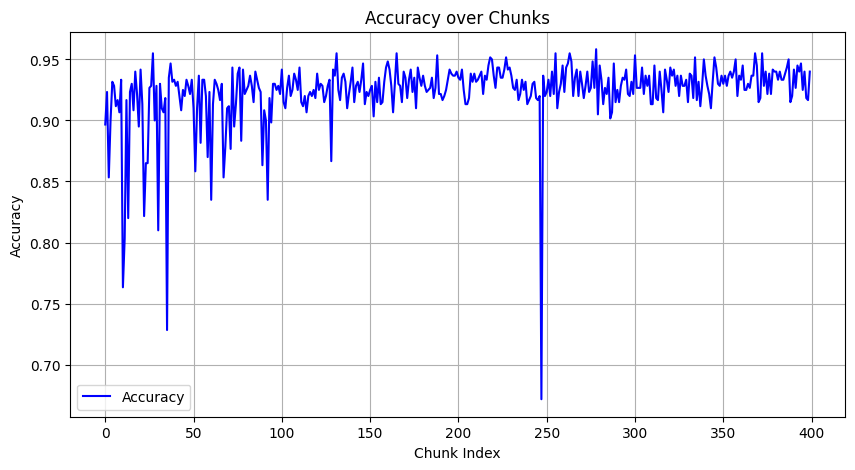

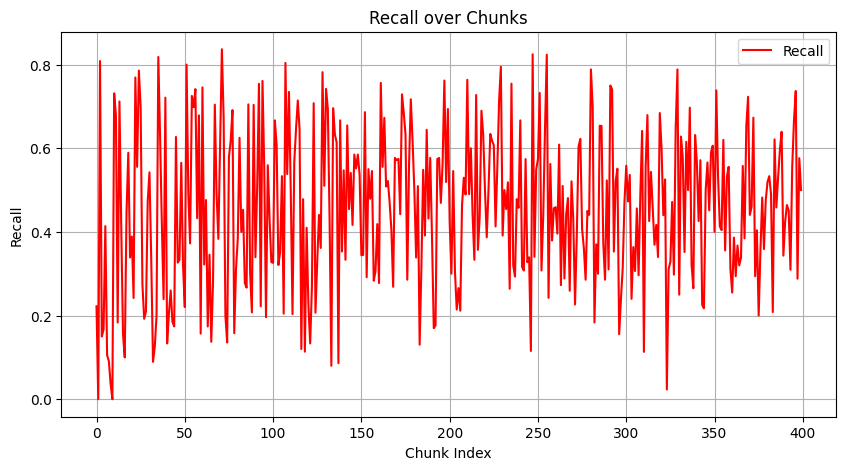

In [367]:
from sklearn.linear_model import LogisticRegression
classifier = SGDClassifier(loss="log_loss")

acc, rec = [], []
for chunk in chunks[100:]:
    x, y = chunk.drop('fraud', axis=1), chunk['fraud']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

    classifier.partial_fit(x_train, y_train, classes=[FRAUD, NOT_FRAUD])

    y_predict=classifier.predict(x_test)
    results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict})

    acc.append(accuracy_score(y_test,y_predict))

    cm = confusion_matrix(y_test,y_predict)

    nt=cm[0][0]
    pf=cm[0][1]
    nf=cm[1][0]
    pt=cm[1][1]

    recall=pt/(pt+nf)
    rec.append(recall)


# Acc
plt.figure(figsize=(10, 5))
plt.plot(acc, label='Accuracy', color='blue')
plt.xlabel('Chunk Index')
plt.ylabel('Accuracy')
plt.title('Accuracy over Chunks')
plt.legend()
plt.grid(True)
plt.show()

# Recall
plt.figure(figsize=(10, 5))
plt.plot(rec, label='Recall', color='red')
plt.xlabel('Chunk Index')
plt.ylabel('Recall')
plt.title('Recall over Chunks')
plt.legend()
plt.grid(True)
plt.show()

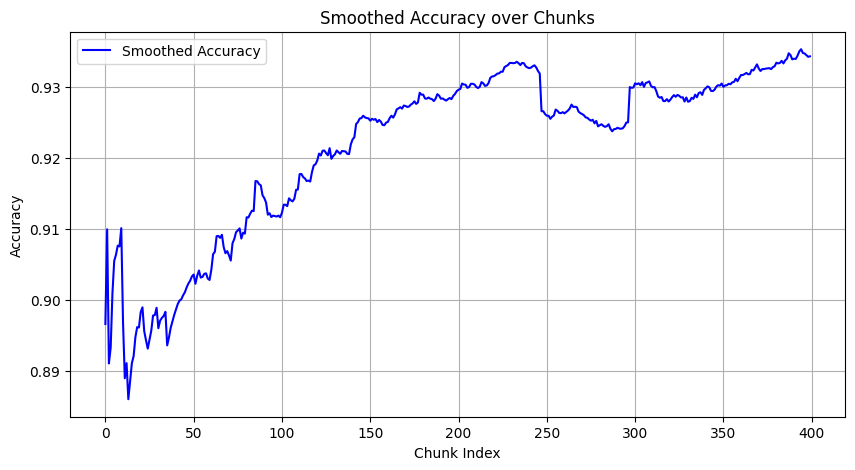

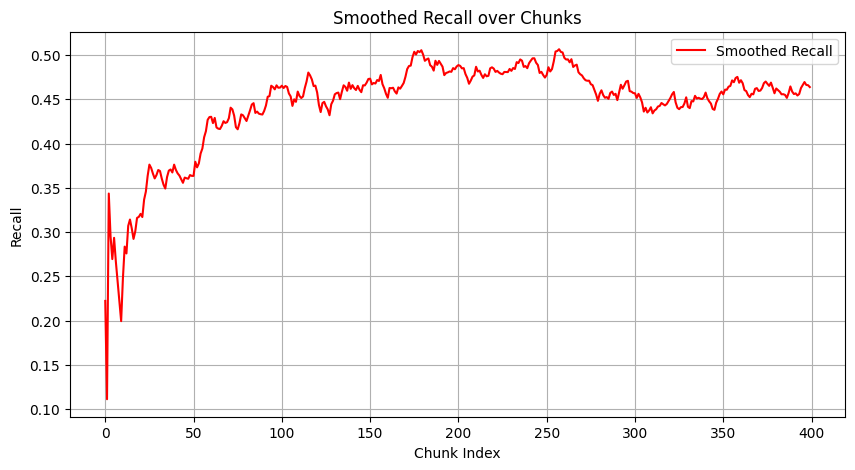

In [369]:
acc_series = pd.Series(acc)
rec_series = pd.Series(rec)

smooth_acc = acc_series.rolling(window=50, min_periods=1).mean()
smooth_rec = rec_series.rolling(window=50, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(smooth_acc, label='Smoothed Accuracy', color='blue')
plt.xlabel('Chunk Index')
plt.ylabel('Accuracy')
plt.title('Smoothed Accuracy over Chunks')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(smooth_rec, label='Smoothed Recall', color='red')
plt.xlabel('Chunk Index')
plt.ylabel('Recall')
plt.title('Smoothed Recall over Chunks')
plt.legend()
plt.grid(True)
plt.show()

# Snorkel for Streaming

In [355]:
filename = '/content/drive/My Drive/SnorkelStreaming/data/card_transdata.csv'
df = pd.read_csv(filename)

# Display the DataFrame
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [356]:
ABSTAIN = -1
FRAUD = 1
NOT_FRAUD = 0

def probabilistic_decision(probability_threshold):
    return FRAUD if np.random.random() < probability_threshold else ABSTAIN

@labeling_function()
def lf_distance_from_home_high(x):
    if x.distance_from_home > 100:
      return probabilistic_decision(0.75)
    elif x.distance_from_home > 50:
      return probabilistic_decision(0.6)
    return ABSTAIN

@labeling_function()
def lf_distance_from_last_transaction_high(x):
    threshold = 5
    probability_threshold = 0.5
    return probabilistic_decision(probability_threshold) if x.distance_from_last_transaction > threshold else ABSTAIN

@labeling_function()
def lf_high_ratio_to_median_purchase_price(x):
    threshold = 3
    probability_threshold = 0.5
    return probabilistic_decision(probability_threshold) if x.ratio_to_median_purchase_price > threshold else ABSTAIN

@labeling_function()
def lf_used_pin_number(x):
    probability_threshold = 0.9
    return NOT_FRAUD if x.used_pin_number == 1 and np.random.random() < probability_threshold else ABSTAIN

@labeling_function()
def lf_online_order_true(x):
    probability_threshold = 0.1
    return probabilistic_decision(probability_threshold) if x.online_order == 1 else ABSTAIN

lfs = [lf_distance_from_home_high, lf_distance_from_last_transaction_high, lf_high_ratio_to_median_purchase_price, lf_online_order_true, lf_used_pin_number]

In [357]:
chunk_num = 500

chunk_size = int(np.ceil(len(df) / chunk_num))

chunks = [df[i:i + chunk_size] for i in range(0, len(df), chunk_size)]

print(len(chunks))

500


In [358]:
train = pd.concat(chunks[:100]).drop("fraud", axis=1)

applier = PandasLFApplier(lfs)

L_train = applier.apply(train)

LFAnalysis(L=L_train, lfs=lfs).lf_summary()

100%|██████████| 200000/200000 [00:24<00:00, 8024.46it/s]


,j,Polarity,Coverage,Overlaps,Conflicts
lf_distance_from_home_high,0,[1],0.082170,0.024090,0.007620
lf_distance_from_last_transaction_high,1,[1],0.092120,0.026255,0.008505
lf_high_ratio_to_median_purchase_price,2,[1],0.078825,0.023020,0.007445
lf_online_order_true,3,[1],0.064830,0.019555,0.006070
lf_used_pin_number,4,[0],0.091800,0.026075,0.026075


In [359]:
label_model = LabelModel(cardinality=2, verbose=True)
label_model.fit(L_train, n_epochs=1000, log_freq=50, seed=123)

100%|██████████| 1000/1000 [00:04<00:00, 228.45epoch/s]


100%|██████████| 1400/1400 [00:00<00:00, 17801.84it/s]


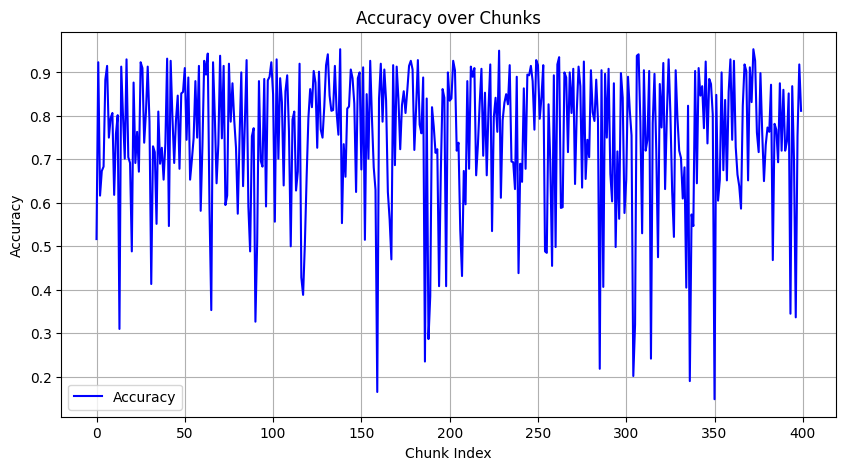

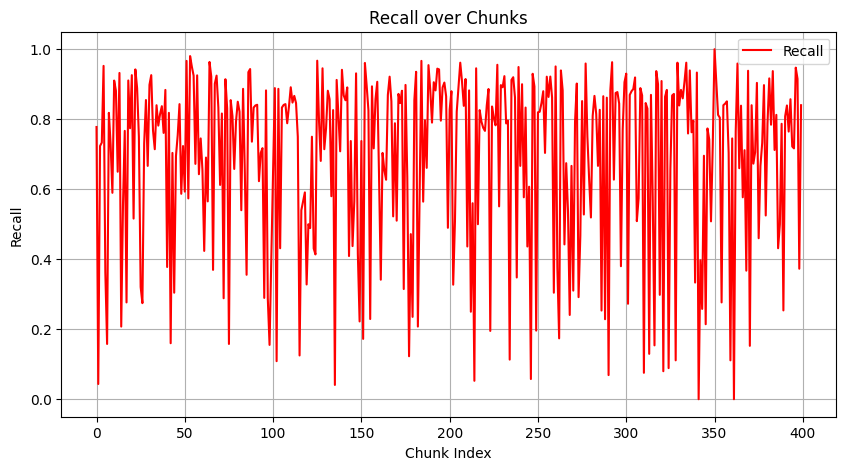

In [360]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss="log_loss")

stream_data = chunks[100:]

acc, rec = [], []
for chunk in stream_data:
    x, y = chunk.drop("fraud", axis=1), chunk.fraud
    x_train, x_test, _, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

    L = applier.apply(x_train)
    y_train = label_model.predict(L=L, tie_break_policy="abstain")
    for i, label in enumerate(y_train):
        if label == ABSTAIN:
            y_train[i] = NOT_FRAUD

    classifier.partial_fit(x_train, y_train, classes=[FRAUD, NOT_FRAUD])

    y_predict=classifier.predict(x_test)

    results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict})

    acc.append(accuracy_score(y_test,y_predict))

    cm = confusion_matrix(y_test,y_predict)
    nt=cm[0][0]
    pf=cm[0][1]
    nf=cm[1][0]
    pt=cm[1][1]

    recall=pt/(pt+nf)
    rec.append(recall)


# Acc
plt.figure(figsize=(10, 5))
plt.plot(acc, label='Accuracy', color='blue')
plt.xlabel('Chunk Index')
plt.ylabel('Accuracy')
plt.title('Accuracy over Chunks')
plt.legend()
plt.grid(True)
plt.show()

# Recall
plt.figure(figsize=(10, 5))
plt.plot(rec, label='Recall', color='red')
plt.xlabel('Chunk Index')
plt.ylabel('Recall')
plt.title('Recall over Chunks')
plt.legend()
plt.grid(True)
plt.show()



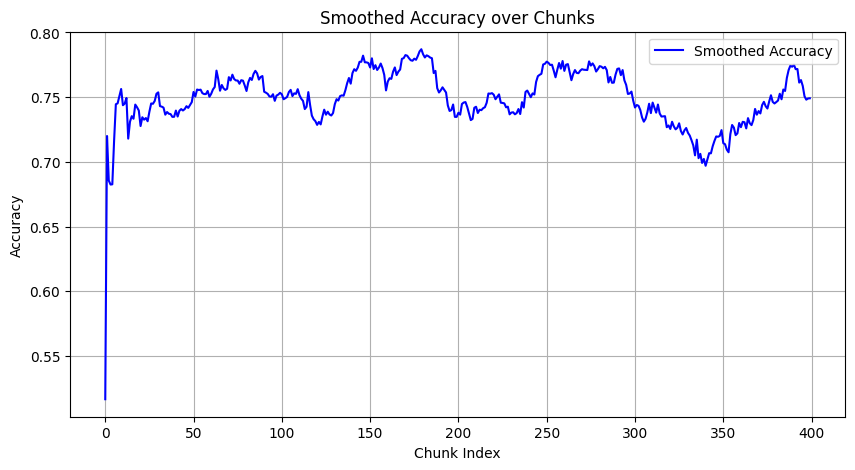

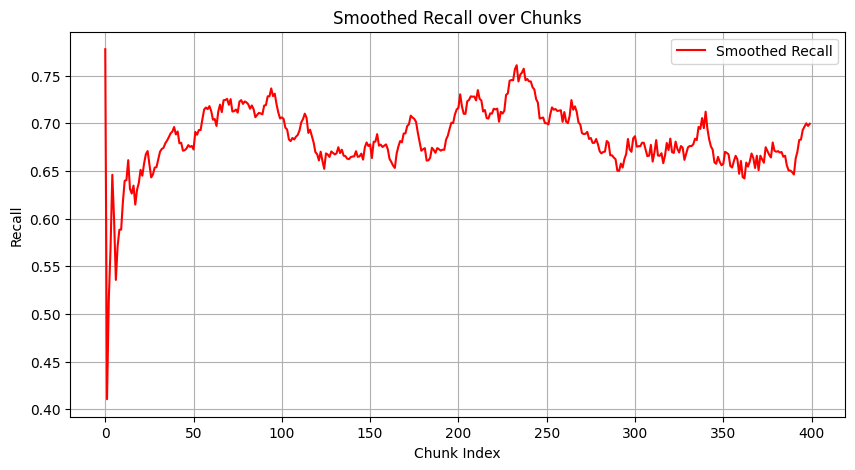

In [364]:
acc_series = pd.Series(acc)
rec_series = pd.Series(rec)

smooth_acc = acc_series.rolling(window=50, min_periods=1).mean()
smooth_rec = rec_series.rolling(window=50, min_periods=1).mean()

plt.figure(figsize=(10, 5))
plt.plot(smooth_acc, label='Smoothed Accuracy', color='blue')
plt.xlabel('Chunk Index')
plt.ylabel('Accuracy')
plt.title('Smoothed Accuracy over Chunks')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(smooth_rec, label='Smoothed Recall', color='red')
plt.xlabel('Chunk Index')
plt.ylabel('Recall')
plt.title('Smoothed Recall over Chunks')
plt.legend()
plt.grid(True)
plt.show()

In [342]:
print(f"Avg Acc: {sum(acc[50:])/(len(acc)-50)}, Avg Rec: {sum(rec[50:])/(len(rec)-50)}")

Avg Acc: 0.7780083333333339, Avg Rec: 0.6666468817230644


Compared perfomance: Avg Acc: 0.918383333333335, Avg Rec: 0.4609614852719456